## Preliminaries

In [1]:
%matplotlib inline

C:\Users\galeag\AppData\Local\Continuum\Anaconda\lib\site-packages\PIL\Image.py:81: RuntimeWarning: The _imaging extension was built for another  version of Pillow or PIL
  warnings.warn(str(v), RuntimeWarning)
C:\Users\galeag\AppData\Local\Continuum\Anaconda\lib\site-packages\PIL\Image.py:81: RuntimeWarning: The _imaging extension was built for another  version of Pillow or PIL
  warnings.warn(str(v), RuntimeWarning)


In [2]:
import zipfile
import os
import pandas as pd
import seaborn as sns

C:\Users\galeag\AppData\Local\Continuum\Anaconda\lib\site-packages\PIL\Image.py:81: RuntimeWarning: The _imaging extension was built for another  version of Pillow or PIL
  warnings.warn(str(v), RuntimeWarning)
C:\Users\galeag\AppData\Local\Continuum\Anaconda\lib\site-packages\PIL\Image.py:81: RuntimeWarning: The _imaging extension was built for another  version of Pillow or PIL
  warnings.warn(str(v), RuntimeWarning)


In [3]:
DATA = os. path.join('.', 'data')
FIGS = os. path.join('.', 'fig')
ZIP_F = os.path.join(DATA, 'HFAAllData20140516.csv.zip')
CSV_F = 'HFAAllData.csv'  # tab-separated file inside the zip archive

## Import Dataset

The data is stored in a zipped archive within the `DATA` directory. We read it directly into a pandas DataFrame and take a peek at the top few records.

In [4]:
fh = open(ZIP_F, 'rb')
with zipfile.ZipFile(fh) as z:
    with z.open(CSV_F) as f:
        HFA = pd.read_csv(f, sep='\t', header=None, 
                          names=['year', 'indicator_id', 
                                 'indicator', 'country', 
                                 'value'])
HFA.head()

,year,indicator_id,indicator,country,value
0,1970,HFA-10,Mid-year population,Albania,2138000
1,1970,HFA-10,Mid-year population,Austria,7390900
2,1970,HFA-10,Mid-year population,Azerbaijan,5172050
3,1970,HFA-10,Mid-year population,Belgium,9637700
4,1970,HFA-10,Mid-year population,Bulgaria,8489600


As we can see, the `indicator_id` column is a string with the characters `'HFA-'` added as a prefix to the numerical id. We extract the numerical id and store it as an integer.

In [5]:
HFA.indicator_id = HFA.indicator_id.str.split('-')
HFA.indicator_id = HFA.indicator_id.str.get(1)
HFA.indicator_id = HFA.indicator_id.astype(int)

HFA.head()

,year,indicator_id,indicator,country,value
0,1970,10,Mid-year population,Albania,2138000
1,1970,10,Mid-year population,Austria,7390900
2,1970,10,Mid-year population,Azerbaijan,5172050
3,1970,10,Mid-year population,Belgium,9637700
4,1970,10,Mid-year population,Bulgaria,8489600


The DataFrame is now in 'tidy' format with each column a variable and each row an observation.

## Indicators

In [6]:
INDICATORS = HFA[['indicator_id', 'indicator']]
INDICATORS = INDICATORS.drop_duplicates()

def find_indicators(search_list):
    temp = INDICATORS.copy()
    for pattern in search_list:
        temp = temp[temp.indicator.str.contains(pattern)]
    return temp

## Plotting a Simple Trend

In [7]:
country = 'Russian Federation'
indicator = 10

data = HFA.ix[(HFA.indicator_id==indicator) & (HFA.country == country), :]
data.head()

,year,indicator_id,indicator,country,value
26,1970,10,Mid-year population,Russian Federation,129941000
6606,1971,10,Mid-year population,Russian Federation,130563000
13760,1972,10,Mid-year population,Russian Federation,131304000
20911,1973,10,Mid-year population,Russian Federation,132069000
28070,1974,10,Mid-year population,Russian Federation,132799000


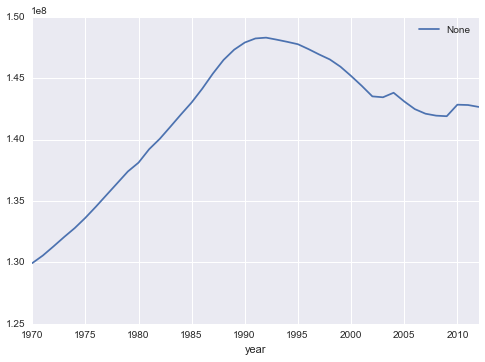

In [8]:
data.plot(x='year', y='value')

# Graphing Function

In [9]:
def plot_trend(country, indicator, title='', figsize=(10, 6)):
    data = HFA.ix[(HFA.indicator_id==indicator) & (HFA.country == country), :]
    data.plot(x='year', y='value', title=title, legend=False, figsize=figsize)

## Graphs

In [10]:
find_indicators(['circ', '0-64', ' male'])

,indicator_id,indicator
1667,1311,"SDR, diseases of circulatory system, 0-64, per..."


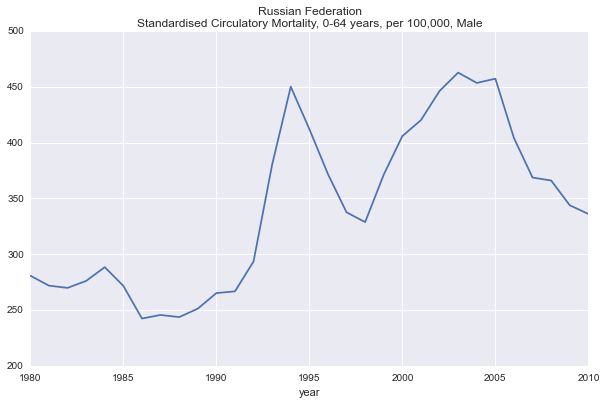

In [11]:
country = 'Russian Federation'
indicator = 1311
title='{}\nStandardised Circulatory Mortality, 0-64 years, per 100,000, Male'.format(country)

plot_trend(country, indicator, title)

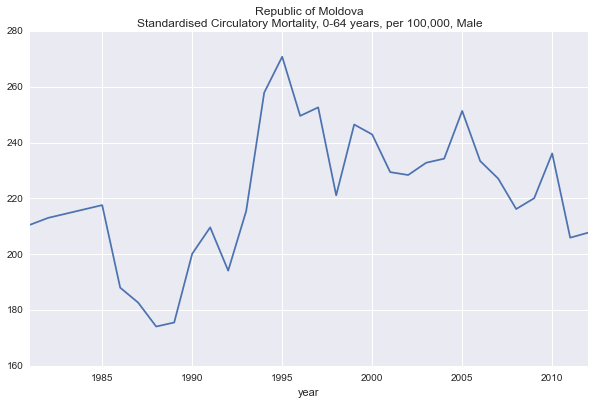

In [12]:
country = 'Republic of Moldova'
indicator = 1311
title='{}\nStandardised Circulatory Mortality, 0-64 years, per 100,000, Male'.format(country)

plot_trend(country, indicator, title)

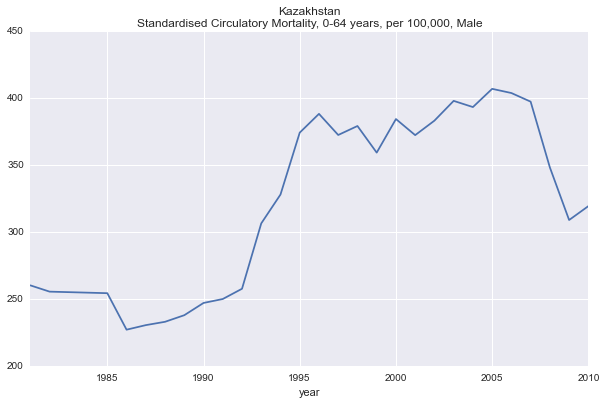

In [13]:
country = 'Kazakhstan'
indicator = 1311
title='{}\nStandardised Circulatory Mortality, 0-64 years, per 100,000, Male'.format(country)

plot_trend(country, indicator, title)

## GDP

In [14]:
find_indicators(['GDP'])

,indicator_id,indicator
754,260,"Gross domestic product (GDP), US$ per capita"
6424,6711,Total health expenditure as % of GDP
359383,300,Total government expenditure as % of GDP
381733,6710,"Total health expenditure as % of GDP, WHO esti..."
381836,6712,Public-sector expenditure on health as % of GD...
381896,6713,Private-sector expenditure on health as % of G...


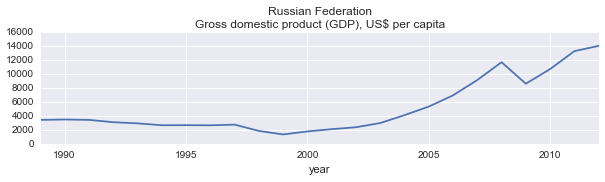

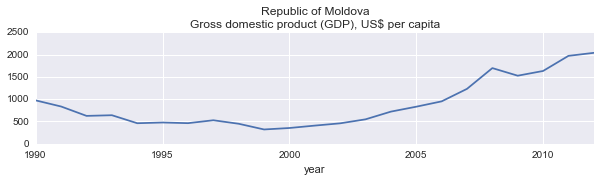

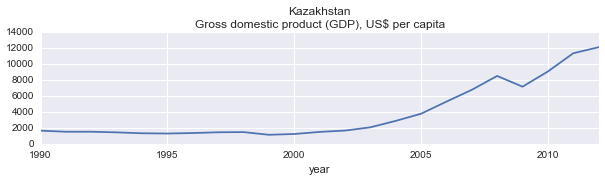

In [15]:
countries = ['Russian Federation', 'Republic of Moldova', 'Kazakhstan']
indicator = 260


for country in countries:
    title='{}\nGross domestic product (GDP), US$ per capita'.format(country)
    plot_trend(country, indicator, title, figsize=(10,2))